In [99]:
import numpy as np
import matplotlib.pyplot as plt
import time
import csv
import pydicom as dicom

In [101]:
ds = dicom.dcmread("E:/Dataset/Mammography/3/CBIS-DDSM/Calc-Training_P_00655_RIGHT_MLO/08-07-2016-DDSM-NA-94506/1.000000-full mammogram images-29314/1-1.dcm")

In [112]:
ds = dicom.dcmread("E:/Dataset/Mammography/3/CBIS-DDSM/Calc-Test_P_00038_LEFT_CC/08-29-2017-DDSM-NA-96009/1.000000-full mammogram images-63992/1-1.dcm")
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.9590.100.1.2.289923739312470966435676008311959891294
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.9590.100.1.2.289923739312470966435676008311959891294
(0008, 0020) Study Date                          DA: ''
(0008, 0023) Content Date     

In [111]:
filename = ds[0x0010, 0x0020].value.split(".dcm")[0]
filename = ds[0x0010, 0x0020].value.split(".dcm")[0]
patient_id=filename.split("_")
tp = []
tp.append("Calc")
filename=tp+patient_id
patient_id

['P', '00038', 'LEFT', 'CC']

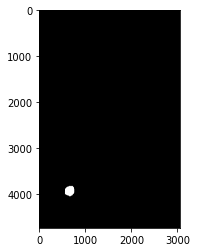

In [40]:
plt.imshow(ds.pixel_array,'gray')

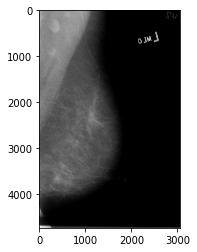

In [41]:
ds = dicom.dcmread("1-0.dcm")
plt.imshow(ds.pixel_array,'gray')

In [43]:
import glob
print(glob.glob("E:/Dataset/Mammography/3/CBIS-DDSM/*/*.dcm")) 

[]


In [44]:
txtfiles = []
path = "E:/Dataset/Mammography/3/CBIS-DDSM/"
for file in glob.glob(path + "\\*.dcm"):
    txtfiles.append(file)

for item in txtfiles:
    print(item)

In [151]:
import os
root = "E:/Dataset/Mammography/3/CBIS-DDSM/"
for path, subdirs, files in os.walk(root):
    if("Calc-" in path and "full mammogram images-" in path):
        for name in files:
            print (os.path.join(path, name))
            ds = dicom.dcmread(os.path.join(path, name))
            outputImg8U = cv2.convertScaleAbs(ds.pixel_array, alpha=(255.0/65535.0))
            filename = ds[0x0010, 0x0020].value.split(".dcm")[0]
            patient_id=filename.split("_")[0:]
            if ("Calc-Training" in patient_id):
                patient_id.remove('Calc-Training')
            elif("Calc-Test" in patient_id):    
                patient_id.remove('Calc-Test')
            tp.append("Calc")
            filename=tp+patient_id
            filename='_'.join(filename)
            print(filename)
            cv2.imwrite(f'E:/Dataset/Mammography/3_8/{filename}.png',outputImg8U)
            # print(name)        

E:/Dataset/Mammography/3/CBIS-DDSM/Calc-Test_P_00038_LEFT_CC\08-29-2017-DDSM-NA-96009\1.000000-full mammogram images-63992\1-1.dcm
Calc_Calc_P_00038_LEFT_CC
E:/Dataset/Mammography/3/CBIS-DDSM/Calc-Test_P_00038_LEFT_MLO\08-29-2017-DDSM-NA-17613\1.000000-full mammogram images-97934\1-1.dcm
Calc_Calc_Calc_P_00038_LEFT_MLO
E:/Dataset/Mammography/3/CBIS-DDSM/Calc-Test_P_00038_RIGHT_CC\08-29-2017-DDSM-NA-28468\1.000000-full mammogram images-63304\1-1.dcm
Calc_Calc_Calc_Calc_P_00038_RIGHT_CC
E:/Dataset/Mammography/3/CBIS-DDSM/Calc-Test_P_00038_RIGHT_MLO\08-29-2017-DDSM-NA-85215\1.000000-full mammogram images-08846\1-1.dcm
Calc_Calc_Calc_Calc_Calc_P_00038_RIGHT_MLO
E:/Dataset/Mammography/3/CBIS-DDSM/Calc-Test_P_00041_LEFT_CC\08-29-2017-DDSM-NA-52275\1.000000-full mammogram images-92812\1-1.dcm
Calc_Calc_Calc_Calc_Calc_Calc_P_00041_LEFT_CC
E:/Dataset/Mammography/3/CBIS-DDSM/Calc-Test_P_00041_LEFT_MLO\08-29-2017-DDSM-NA-80130\1.000000-full mammogram images-81387\1-1.dcm
Calc_Calc_Calc_Calc_Calc_

KeyboardInterrupt: 

In [ ]:
import os
root = "E:/Dataset/Mammography/3/CBIS-DDSM/"
for path, subdirs, files in os.walk(root):
    if("Calc-" in path and "full mammogram images-" not in path):
        for name in files:
            if "1-2.dcm" in name:
                print (os.path.join(path, name))
                ds = dicom.dcmread(os.path.join(path, name))
                outputImg8U = cv2.convertScaleAbs(ds.pixel_array)
                filename = ds[0x0010, 0x0020].value.split(".dcm")[0]
                patient_id=filename.split("_")[0:]
                if ("Calc-Training" in patient_id):
                    patient_id.remove('Calc-Training')
                elif("Calc-Test" in patient_id):    
                    patient_id.remove('Calc-Test')
                tp = []
                tp.append("Calc")
                filename=tp+patient_id
                filename='_'.join(filename)
                print(filename)
                cv2.imwrite(f'E:/Dataset/Mammography/3_8/{filename}_mask.png',ds.pixel_array)
                # print(name)        

E:/Dataset/Mammography/3/CBIS-DDSM/Calc-Test_P_00038_LEFT_CC\08-29-2017-DDSM-NA-96009\1.000000-full mammogram images-63992\1-1.dcm


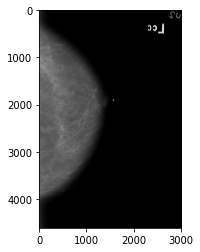

In [6]:
ds = dicom.dcmread(calc)
plt.imshow(ds.pixel_array,'gray')
print (calc)

In [7]:
import cv2
cv2.imshow("anotherone", ds.pixel_array)
cv2.waitKey(0) 
  
#closing all open windows 
cv2.destroyAllWindows() 

In [8]:
cv2.imwrite("RAUUUUUUUUUUL.png", ds.pixel_array)

True

In [9]:
ds.pixel_array.shape

(4616, 3016)

In [13]:
cv2.imread('RAUUUUUUUUUUL.png', cv2.IMREAD_UNCHANGED).shape

(4616, 3016)

In [15]:
ds.pixel_array.dtype

dtype('uint16')

In [16]:
outputImg8U = cv2.convertScaleAbs(ds.pixel_array, alpha=(255.0/65535.0))

In [17]:
outputImg8U.dtype

dtype('uint8')

In [20]:
cv2.imwrite("RAUUUUUUUUUUL16.png",ds.pixel_array)

True

In [43]:
filename = calc.split("/")[-1]
filename = filename.split("\\")[0]
filename = filename.split("_")
len(filename)
for i in range(len(filename)):
    print(i)
    filename += filename[i]
filename

0
1
2
3
4


['Calc-Test',
 'P',
 '00038',
 'LEFT',
 'CC',
 'C',
 'a',
 'l',
 'c',
 '-',
 'T',
 'e',
 's',
 't',
 'P',
 '0',
 '0',
 '0',
 '3',
 '8',
 'L',
 'E',
 'F',
 'T',
 'C',
 'C']

In [32]:
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.9590.100.1.2.289923739312470966435676008311959891294
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.9590.100.1.2.289923739312470966435676008311959891294
(0008, 0020) Study Date                          DA: ''
(0008, 0023) Content Date     

In [61]:
ds[0x0010, 0x0020].value.split(".dcm")[0]

'Calc-Training_P_02584_LEFT_MLO'

In [58]:
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.9590.100.1.2.69758101711968228312720869661314614453
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.9590.100.1.2.69758101711968228312720869661314614453
(0008, 0020) Study Date                          DA: '20160807'
(0008, 0023) Content Dat

In [62]:
a=ds[0x0010, 0x0020].value.split(".dcm")[0]

In [78]:
c=("Calc")
b=a.split("_")[1:]
c=a + b
c

TypeError: can only concatenate str (not "list") to str

In [68]:
'_'.join(a.split('_')[1:])

'P_02584_LEFT_MLO'

In [80]:
c

'Calc'

In [81]:
b

['P', '02584', 'LEFT', 'MLO']

In [82]:
type(c)

str

In [83]:
d=[]
d.append(c)
type(d)

list

In [84]:
e=d+b

In [85]:
e

['Calc', 'P', '02584', 'LEFT', 'MLO']

In [86]:
'_'.join(e)

'Calc_P_02584_LEFT_MLO'

In [123]:
a=["ola","adeus","comi"]
if(("ola" or "asdsad") in a):
    print("oal")

oal


In [149]:
ds = dicom.dcmread("1-1.dcm")

In [150]:
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.9590.100.1.2.338899151111305765125644107920616871552
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.9590.100.1.2.338899151111305765125644107920616871552
(0008, 0020) Study Date                          DA: '20170906'
(0008, 0023) Content D

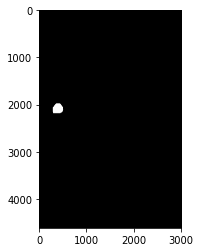

In [130]:
plt.imshow(ds.pixel_array,'gray')

In [131]:
outputImg8U = cv2.convertScaleAbs(ds.pixel_array, alpha=(1.0/255.0))

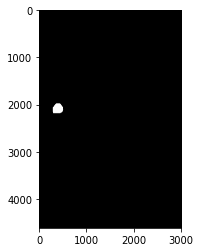

In [132]:
plt.imshow(outputImg8U,'gray')

In [134]:
np.unique(outputImg8U)

array([0, 1], dtype=uint8)

In [1]:
import os
root = "E:/Dataset/Mammography/3/CBIS-DDSM/"
i=0
for path, subdirs, files in os.walk(root):
    if("Calc-" in path and "full mammogram images-" in path):
        for name in files:
            i=i+1
            # print (os.path.join(path, name))
            # ds = dicom.dcmread(os.path.join(path, name))
            # outputImg8U = cv2.convertScaleAbs(ds.pixel_array, alpha=(255.0/65535.0))
            # filename = ds[0x0010, 0x0020].value.split(".dcm")[0]
            # patient_id=filename.split("_")[0:]
            # if ("Calc-Training" in patient_id):
            #     patient_id.remove('Calc-Training')
            # elif("Calc-Test" in patient_id):    
            #     patient_id.remove('Calc-Test')
            # tp = []
            # tp.append("Calc")
            # filename=tp+patient_id
            # filename='_'.join(filename)
            # print(filename)
            # cv2.imwrite(f'E:/Dataset/Mammography/3_8/{filename}.png',outputImg8U)
            # print(name)   
i

1511

In [163]:
import os
root = "E:/Dataset/Mammography/3/CBIS-DDSM/"
for path, subdirs, files in os.walk(root):
    if("Calc-" in path and "full mammogram images-" not in path):
        for name in files:
            if "1-2.dcm" in name:
                # print (os.path.join(path, name))
                ds = dicom.dcmread(os.path.join(path, name))
                # outputImg8U = cv2.convertScaleAbs(ds.pixel_array)
                filename = ds[0x0010, 0x0020].value.split(".dcm")[0]
                patient_id=filename.split("_")[0:]
                if ("Calc-Training" in patient_id):
                    patient_id.remove('Calc-Training')
                elif("Calc-Test" in patient_id):    
                    patient_id.remove('Calc-Test')
                tp = []
                tp.append("Calc")
                filename=tp+patient_id
                filename='_'.join(filename)
                print(filename)
                cv2.imwrite(f'E:/Dataset/Mammography/3_8/{filename}_mask.png',ds.pixel_array)
                # print(name)   

Calc_P_00038_LEFT_CC_1
Calc_P_00038_LEFT_MLO_1
Calc_P_00038_RIGHT_CC_1
Calc_P_00038_RIGHT_CC_2
Calc_P_00038_RIGHT_MLO_1
Calc_P_00038_RIGHT_MLO_2
Calc_P_00041_LEFT_CC_2
Calc_P_00041_LEFT_MLO_2
Calc_P_00077_LEFT_CC_1
Calc_P_00077_LEFT_MLO_1
Calc_P_00077_RIGHT_CC_1
Calc_P_00077_RIGHT_CC_2
Calc_P_00077_RIGHT_MLO_1
Calc_P_00077_RIGHT_MLO_2
Calc_P_00100_RIGHT_CC_1
Calc_P_00100_RIGHT_MLO_1
Calc_P_00127_RIGHT_CC_1
Calc_P_00127_RIGHT_MLO_1
Calc_P_00132_LEFT_MLO_1
Calc_P_00140_LEFT_CC_1
Calc_P_00140_LEFT_CC_2
Calc_P_00140_LEFT_MLO_1
Calc_P_00140_LEFT_MLO_2
Calc_P_00140_RIGHT_CC_1
Calc_P_00140_RIGHT_CC_2
Calc_P_00140_RIGHT_MLO_1
Calc_P_00140_RIGHT_MLO_2
Calc_P_00141_LEFT_CC_1
Calc_P_00141_LEFT_MLO_1
Calc_P_00150_RIGHT_MLO_1
Calc_P_00163_LEFT_CC_1
Calc_P_00163_LEFT_MLO_1
Calc_P_00164_RIGHT_CC_1
Calc_P_00180_LEFT_CC_1
Calc_P_00180_LEFT_MLO_1
Calc_P_00195_LEFT_CC_1
Calc_P_00195_LEFT_MLO_1
Calc_P_00202_RIGHT_CC_2
Calc_P_00202_RIGHT_MLO_2
Calc_P_00214_LEFT_CC_1
Calc_P_00214_LEFT_CC_2
Calc_P_00214_LEFT

In [144]:
patient_id

['Calc-Test', 'P', '00390', 'RIGHT', 'CC']

In [139]:
patient_id.remove('P')

In [162]:
root = "E:/Dataset/Mammography/3_8"
import glob
img_id= 0
seg_id=1
old_patient=""
actual_patient="/"
for file in glob.glob("E:/Dataset/Mammography/3_8/*_mask.png"):
# import os
    os.remove(file)

In [10]:
import os
import glob
import cv2
Y=[]
X=[]
root = "E:/Dataset/Mammography/3_8/*.png"
for files in glob.glob(root):
    a=cv2.imread(files)
    Y.append(a.shape[0])
    X.append(a.shape[1])

In [11]:
max(Y),max(X)

(7111, 5251)